By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/05

Videos:
* [[10分鐘搞懂機器學習] 6.2 非線性支援向量機分類 Nonlinear SVM](https://youtu.be/FXoDbB-6G_s?si=7w_sTgnYf_d5Y5Fw)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


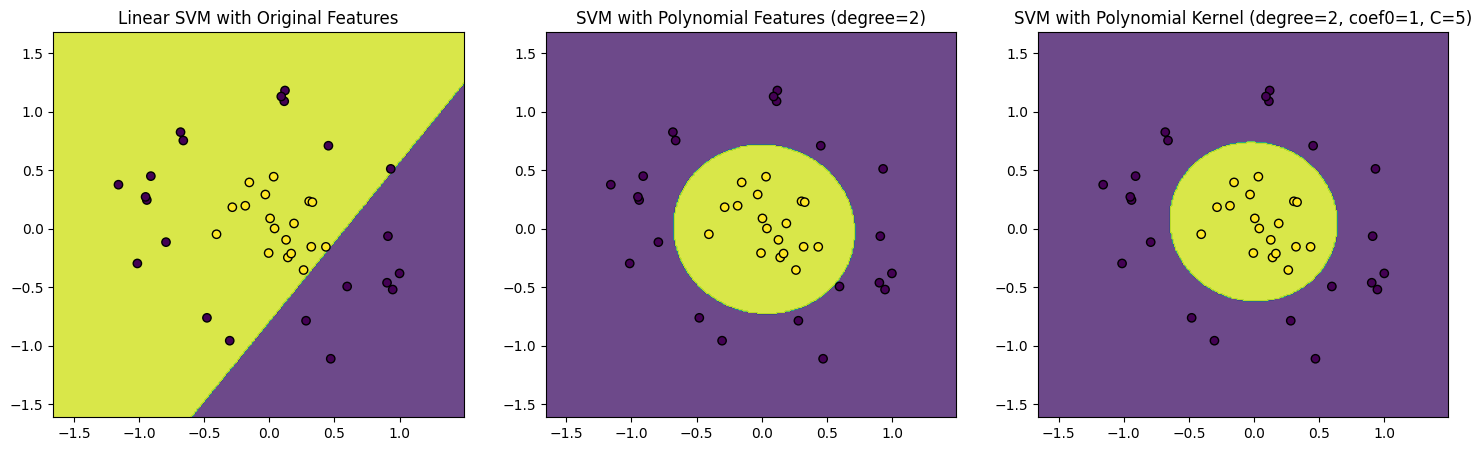

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# 生成更复杂的非线性数据集
X, y = make_circles(n_samples=200, noise=0.1, factor=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 不使用多项式特征的SVM模型
svm_linear_clf = SVC(kernel='linear')
svm_linear_clf.fit(X_train, y_train)

# 使用多项式特征（degree=2）的SVM模型
degree = 2
svm_poly_clf = make_pipeline(PolynomialFeatures(degree=degree), SVC(kernel='linear'))
svm_poly_clf.fit(X_train, y_train)

# 使用多项式核（degree=2）的SVM模型
svm_poly_kernel_clf = SVC(kernel='poly', degree=2, coef0=1, C=5)
svm_poly_kernel_clf.fit(X_train, y_train)

# 定义可视化函数
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title(title)

# 创建图像
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 不使用多项式特征的SVM
plot_decision_boundary(svm_linear_clf, X_test, y_test, axes[0], "Linear SVM with Original Features")

# 使用多项式特征的SVM
plot_decision_boundary(svm_poly_clf, X_test, y_test, axes[1], "SVM with Polynomial Features (degree=2)")

# 使用多项式核的SVM
poly_kernel_title = f"SVM with Polynomial Kernel (degree=2, coef0=1, C=5)"
plot_decision_boundary(svm_poly_kernel_clf, X_test, y_test, axes[2], poly_kernel_title)

plt.show()


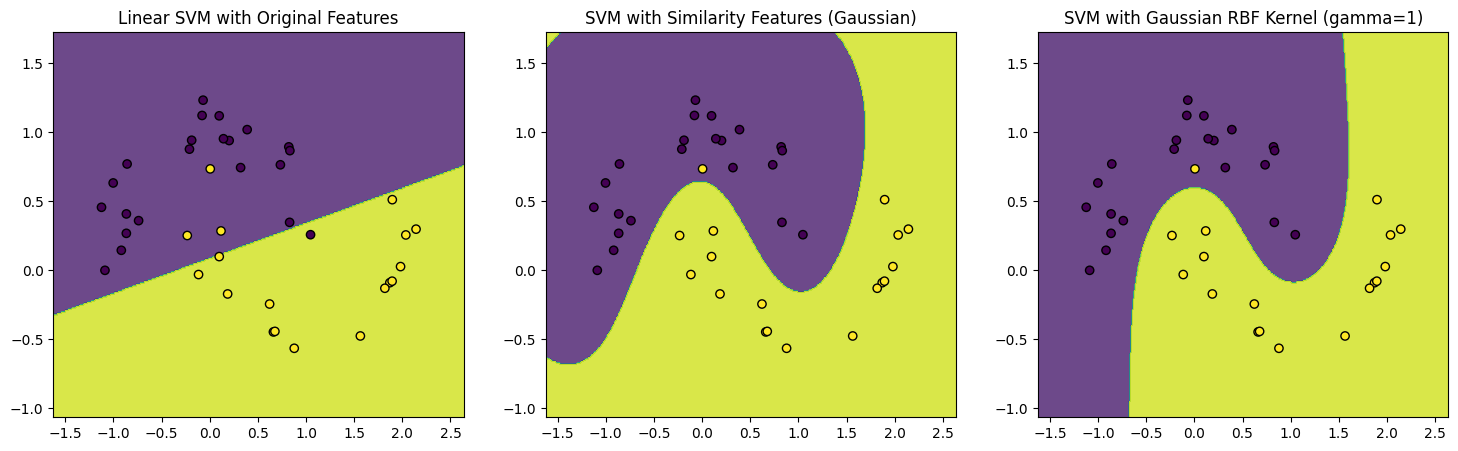

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import rbf_kernel

# 生成新的非线性数据集
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. 使用原始特征的线性SVM模型
svm_linear_clf = SVC(kernel='linear')
svm_linear_clf.fit(X_train, y_train)

# 2. 使用相似特征的SVM模型（基于高斯相似度）
gamma_similarity = 1.0
X_train_similarity = rbf_kernel(X_train, X_train, gamma=gamma_similarity)
svm_similarity_clf = SVC(kernel='linear')
svm_similarity_clf.fit(X_train_similarity, y_train)


# 转换测试集
X_test_similarity = rbf_kernel(X_test, X_train, gamma=gamma_similarity)

# 3. 使用Gaussian RBF核的SVM模型
gamma_rbf = 1.0
svm_rbf_clf = SVC(kernel='rbf', gamma=gamma_rbf)
svm_rbf_clf.fit(X_train, y_train)

# 定义可视化函数
def plot_decision_boundary(clf, X, y, ax, title, is_similarity=False, X_train=None):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    if is_similarity:
        Z = clf.predict(rbf_kernel(np.c_[xx.ravel(), yy.ravel()], X_train, gamma=gamma_similarity))
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title(title)

# 创建图像
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. 使用原始特征的线性SVM
plot_decision_boundary(svm_linear_clf, X_test, y_test, axes[0], "Linear SVM with Original Features")

# 2. 使用相似特征的SVM
plot_decision_boundary(svm_similarity_clf, X_test, y_test, axes[1], "SVM with Similarity Features (Gaussian)", is_similarity=True, X_train=X_train)

# 3. 使用Gaussian RBF核的SVM
plot_decision_boundary(svm_rbf_clf, X_test, y_test, axes[2], "SVM with Gaussian RBF Kernel (gamma=1)")

plt.show()
